WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 4

---

----
## 1. Poisson Process

Show that the interval distribution of a renewal process with constant probability is an exponential distribution.

As the question states that renewal process has constant probability at all time points, lets call it $\lambda$ 
Now consider a time interval $t$ and split it into $n$ smaller intervals $\Delta t$ 
Let the time from current spike to next spike be $\tau$
$$
P(\tau>0) = 1
$$
$$
P(\tau > \Delta t)  = 1 - \lambda\Delta t
$$
Similarly for next $n$ small intervals
$$
P(\tau > n\Delta t) = (1 - \lambda\Delta t)^n
$$
Now, let the size of time step be infinitesimally small
$$
P(\tau > T) = \lim_{ n \to \infty }  \left( 1 - \frac{\lambda T}{n} \right)^n = e^{-\lambda T}
$$
Therefore,
$$
P(\tau<T) = 1 - e^{-\lambda T}
$$
Thus, calculating p.d.f. of $\tau$ is:
$$
p(\tau) = \lambda e^{-\lambda T}
$$



---
## 2. Spike Rate Estimation

The file `rgc_data.dat` contains spike trains from a magnocellular (parasol) retinal ganglion cell in responding to a contrast edge presented in its receptive field. Each row in the file represents responses in one trial, with spikes in 1ms time bins where 0 indicates no spike and 1 indicates the ocurrence of a spike.
The length of each measurement is 600 ms. The stimulus was presented for 250 ms between 50 and 300 ms in each trial (see the figure on lecture slide 21 bottom left).

The data are in ascii format so we can load them using numpy's `loadtxt` function.

In [43]:
import numpy as np
import pylab as pl

spiketrains = np.loadtxt("rgc_data.dat",dtype=int)
spiketrains.shape # 20 trials x 600 time bins

(20, 600)

Calculate and plot a peri-stimulus time histogram (PSTH) of the responses by averaging the trials.

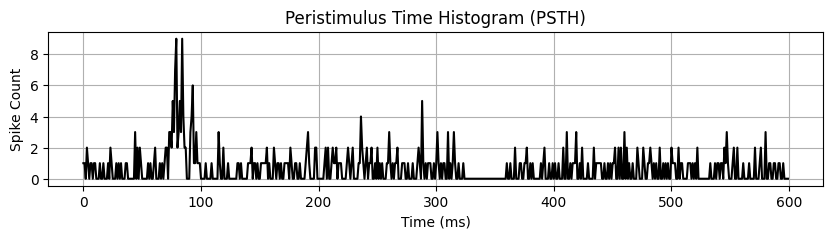

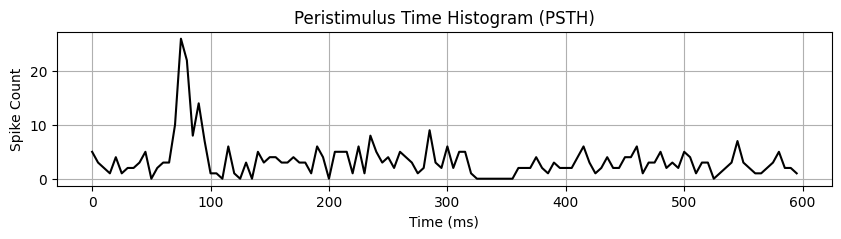

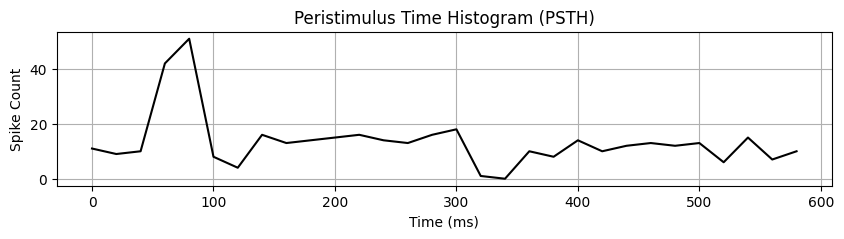

In [44]:
bin_width = 1 #ms
num_bins = spiketrains.shape[1] // bin_width
total_spikes = np.sum(spiketrains, axis=0)
# PSTH calculation
psth = np.zeros(num_bins)
for i in range(num_bins):
    psth[i] = np.sum(total_spikes[i*bin_width:(i+1)*bin_width])

time = np.arange(num_bins) * bin_width
pl.figure(figsize=(10, 2))
pl.plot(time, psth, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Spike Count")
pl.title("Peristimulus Time Histogram (PSTH)")
pl.grid()
pl.show()

bin_width = 5 #ms
num_bins = spiketrains.shape[1] // bin_width
total_spikes = np.sum(spiketrains, axis=0)
# PSTH calculation
psth = np.zeros(num_bins)
for i in range(num_bins):
    psth[i] = np.sum(total_spikes[i*bin_width:(i+1)*bin_width])

time = np.arange(num_bins) * bin_width
pl.figure(figsize=(10, 2))
pl.plot(time, psth, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Spike Count")
pl.title("Peristimulus Time Histogram (PSTH)")
pl.grid()
pl.show()

bin_width = 20 #ms
num_bins = spiketrains.shape[1] // bin_width
total_spikes = np.sum(spiketrains, axis=0)
# PSTH calculation
psth = np.zeros(num_bins)
for i in range(num_bins):
    psth[i] = np.sum(total_spikes[i*bin_width:(i+1)*bin_width])

time = np.arange(num_bins) * bin_width
pl.figure(figsize=(10, 2))
pl.plot(time, psth, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Spike Count")
pl.title("Peristimulus Time Histogram (PSTH)")
pl.grid()
pl.show()

Due to the discrete nature of the spike data and limited number of trials the histogram with a 1 ms resolution looks noisy.
Let's try to obtain a smoother spike rate estimate.

### 1.1. Binning

Average the spike in bins of 10 ms and plot the resulting histogram.

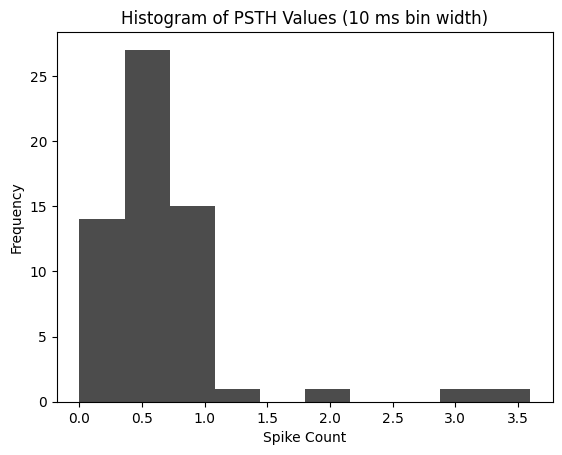

In [45]:
bin_width = 10 #ms
num_bins = spiketrains.shape[1] // bin_width
total_spikes = np.sum(spiketrains, axis=0)
# PSTH calculation
psth = np.zeros(num_bins)
for i in range(num_bins):
    psth[i] = np.mean(total_spikes[i*bin_width:(i+1)*bin_width])

pl.hist(psth, color='k', alpha=0.7)
pl.xlabel("Spike Count")
pl.ylabel("Frequency")
pl.title("Histogram of PSTH Values (10 ms bin width)")
# pl.grid()
pl.show()


Shift the bins in steps of 1 ms and compare the resulting histograms. Note how the histogram changes with bin placement, especially at the response peak. How would this affect estimates of maximum firing rate?

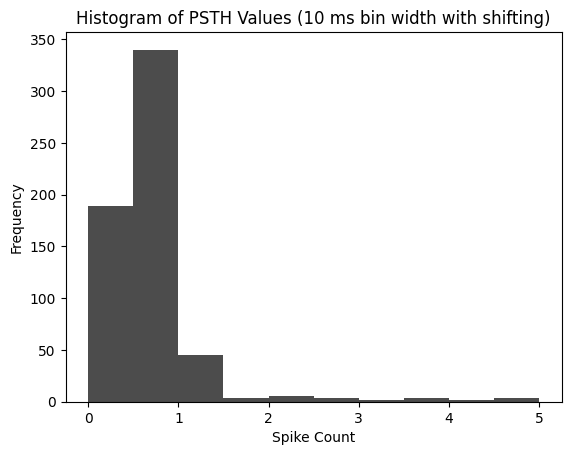

In [46]:
bin_width = 10 #ms

total_spikes = np.sum(spiketrains, axis=0)
# PSTH calculation
average_spikes = np.zeros(len(total_spikes))
for i in range(0 ,len(total_spikes) -  bin_width):
    average_spikes[i] = np.mean(total_spikes[i:i + bin_width])

pl.hist(average_spikes, color='k', alpha=0.7)
pl.xlabel("Spike Count")
pl.ylabel("Frequency")
pl.title("Histogram of PSTH Values (10 ms bin width with shifting)")
# pl.grid()
pl.show()


### 1.2. Kernel Density Estimation

**a)**
KDE Spike rate estimation is done by convolving the spike trains with a smooth kernel.
Create a Gaussian kernel with a standard deviation of 5 ms and convolve the original PSTH with the kernel.
Compare the histogram and the spike density estimate.

In [47]:
def kernel(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))

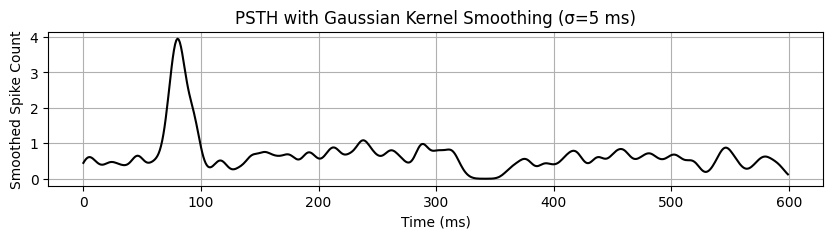

In [48]:
stdev = 5
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()

**b)**
Vary the width of the kernel and observe what happens when the kernel gets narrower or wider. Which kernel width would you choose?

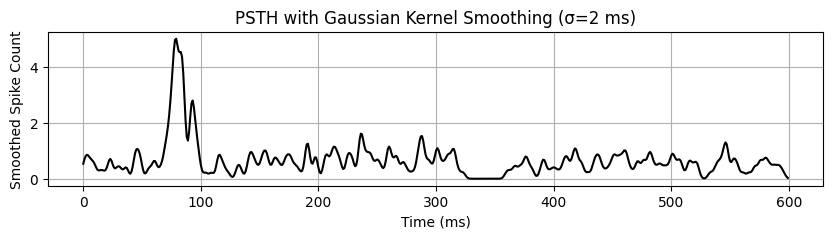

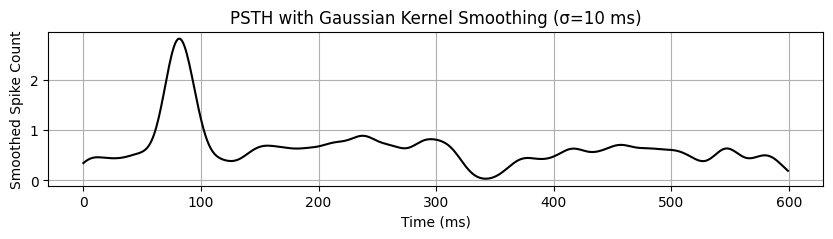

In [49]:
stdev = 2
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()

stdev = 10
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()

**c)**
Now let's pretend we have even less data. Take 5 trials out of the 20 and repeat the above. Compare the difference between the histograms with the difference between the spike density estimates.

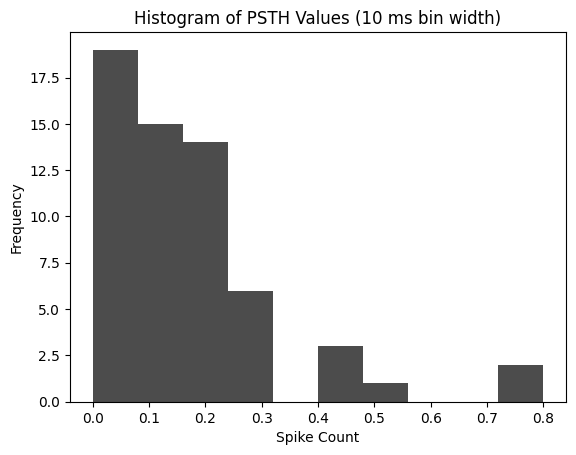

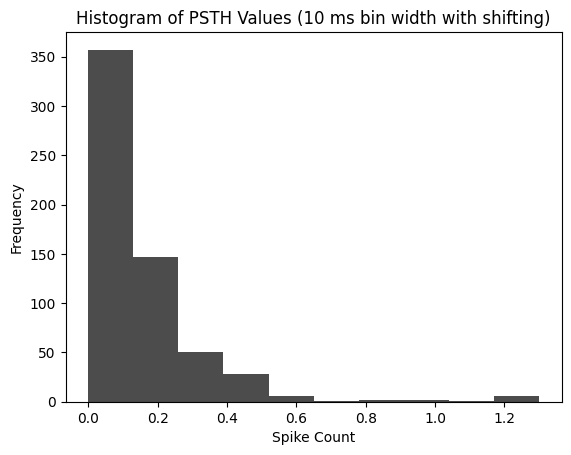

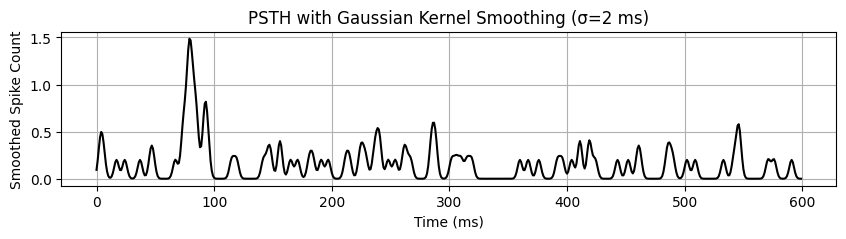

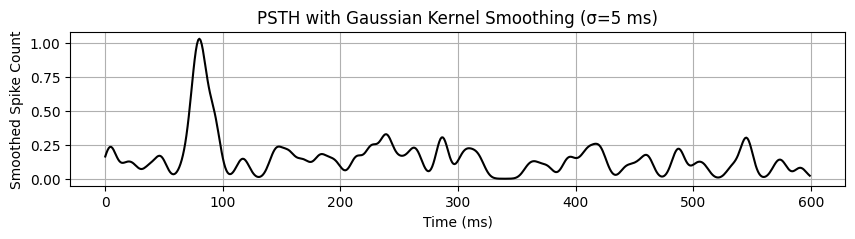

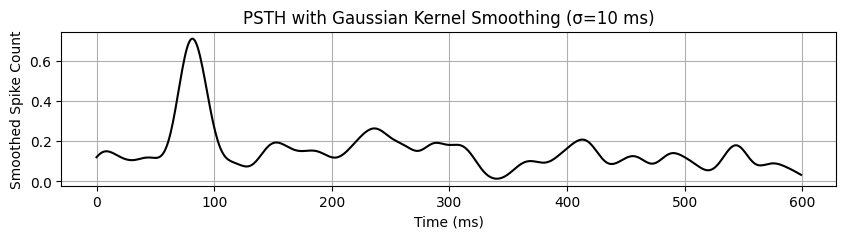

In [52]:
total_spikes = np.sum(spiketrains[:5,:], axis=0) 
bin_width = 10 #ms
psth = np.zeros(num_bins)
for i in range(num_bins):
    psth[i] = np.mean(total_spikes[i*bin_width:(i+1)*bin_width])

pl.hist(psth, color='k', alpha=0.7)
pl.xlabel("Spike Count")
pl.ylabel("Frequency")
pl.title("Histogram of PSTH Values (10 ms bin width)")
# pl.grid()
pl.show()

average_spikes = np.zeros(len(total_spikes))
for i in range(0 ,len(total_spikes) -  bin_width):
    average_spikes[i] = np.mean(total_spikes[i:i + bin_width])

pl.hist(average_spikes, color='k', alpha=0.7)
pl.xlabel("Spike Count")
pl.ylabel("Frequency")
pl.title("Histogram of PSTH Values (10 ms bin width with shifting)")
# pl.grid()
pl.show()

stdev = 2
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()

stdev = 5
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()

stdev = 10
time = np.arange(len(total_spikes))
a = np.zeros(len(total_spikes))
for t in range(len(total_spikes)):
    for ti in range(len(total_spikes)):
        a[t] += total_spikes[ti] * kernel(t, ti, stdev)
pl.figure(figsize=(10, 2))
pl.plot(time, a, 'k')
pl.xlabel("Time (ms)")
pl.ylabel("Smoothed Spike Count")
pl.title(f"PSTH with Gaussian Kernel Smoothing (σ={stdev} ms)")
pl.grid()
pl.show()